<function __main__.<lambda>(x)>

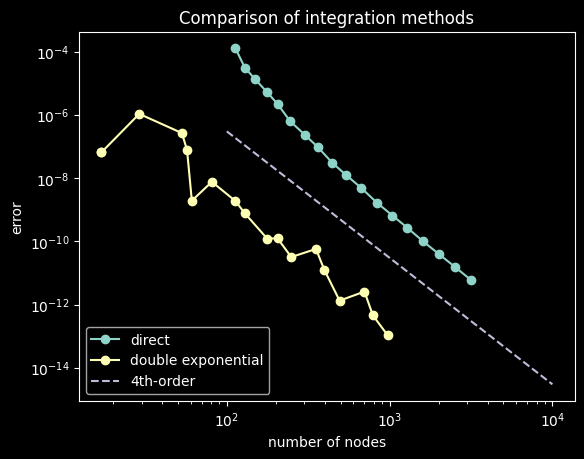

In [7]:
import warnings
import numpy as np
from matplotlib.pyplot import *

def intinf(f, tol):
    xi = lambda t: np.sinh(np.sinh(t))
    dxi_dt = lambda t: np.cosh(t) * np.cosh(np.sinh(t))
    g = lambda t: f(xi(t)) * dxi_dt(t)
    M = 3
    while (abs(g(-M)) > tol/100) or (abs(g(M)) > tol/100):
        M += 0.5
        if np.isinf(xi(M)):
            warnings.warn("Function may not decay fast enough.")
            M -= 0.5
            break

    I, t = intadapt(g,-M,M,tol)
    x = xi(t)
    return I, x

def intadapt(f, a, b, tol):
    # Use error estimation and recursive bisection.
    def do_integral(a, fa, b, fb, m, fm, tol):
        # These are the two new nodes and their f-values.
        xl = (a + m) / 2
        fl = f(xl)
        xr = (m + b) / 2
        fr = f(xr)
        t = np.array([a, xl, m, xr, b])  # all 5 nodes at this level

        # Compute the trapezoid values iteratively.
        h = b - a
        T = np.zeros(3)
        T[0] = h * (fa + fb) / 2
        T[1] = T[0] / 2 + (h / 2) * fm
        T[2] = T[1] / 2 + (h / 4) * (fl + fr)

        S = (4 * T[1:] - T[:-1]) / 3  # Simpson values
        E = (S[1] - S[0]) / 15  # error estimate

        if abs(E) < tol * (1 + abs(S[1])):  # acceptable error?
            Q = S[1]  # yes--done
        else:
            # Error is too large--bisect and recurse.
            QL, tL = do_integral(a, fa, m, fm, xl, fl, tol)
            QR, tR = do_integral(m, fm, b, fb, xr, fr, tol)
            Q = QL + QR
            t = np.hstack([tL, tR[1:]])  # merge the nodes w/o duplicate
        return Q, t

    m = (b + a) / 2
    Q, t = do_integral(a, f(a), b, f(b), m, f(m), tol)
    return Q, t

def intsing(f, tol):
    xi = lambda t: 2 / (1 + np.exp( 2*np.sinh(t) ))
    dxi_dt = lambda t: np.cosh(t) / np.cosh(np.sinh(t))**2
    g = lambda t: f(xi(t)) * dxi_dt(t)
    # Find where to truncate the integration interval.
    M = 3
    while abs(g(M)) > tol/100:
        M += 0.5
        if xi(M) == 0:
            warnings.warn("Function may grow too rapidly.")
            M -= 0.5
            break

    I, t = intadapt(g, 0, M, tol)
    x = xi(t)
    return I, x

f = lambda x: 1 / (10 *(np.sqrt(x)))
exact = 0.2
tol = np.array([1 / 10**d for d in np.arange(5, 14, 0.5)])
err = np.zeros((tol.size, 2))
length = np.zeros((tol.size, 2))
for k in range(tol.size):
    I1, x1 = intadapt(f, (tol[k]/20)**2, 1, tol[k])
    I2, x2 = intsing(f, tol[k])
    err[k] = abs(exact - np.array([I1, I2]))
    length[k] = [x1.size, x2.size]
loglog(length, err, "-o")
# plot(len,err,m=:o,label=["direct" "double exponential"])
n = np.array([100, 10000])
loglog(n, 30 / n**4, '--')
xlabel("number of nodes"),  ylabel("error")
title("Comparison of integration methods")
legend(["direct", "double exponential", "4th-order"], loc="lower left");f

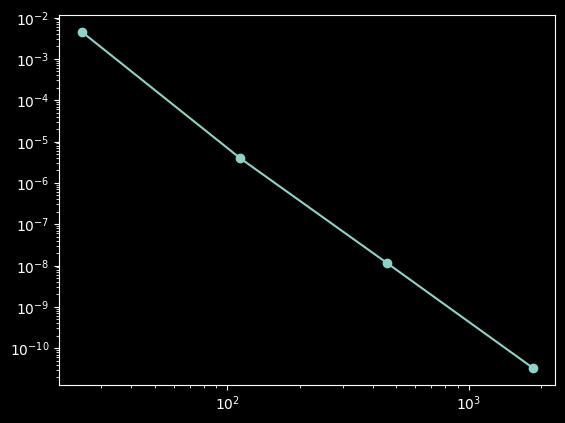

In [11]:
#9.7.1
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

f = lambda x: (1 + x**2)**(-2 / 3)
exact = np.sqrt(np.pi) * sp.special.gamma(1 / 6) / sp.special.gamma(2 / 3)
tolerance = [1e-3, 1e-6, 1e-9, 1e-12]
err = []
length = []
for tol in tolerance:
    I, x = intinf(f, tol)
    err.append(abs(exact - I))
    length.append(x.size)
loglog(length, err, "-o")

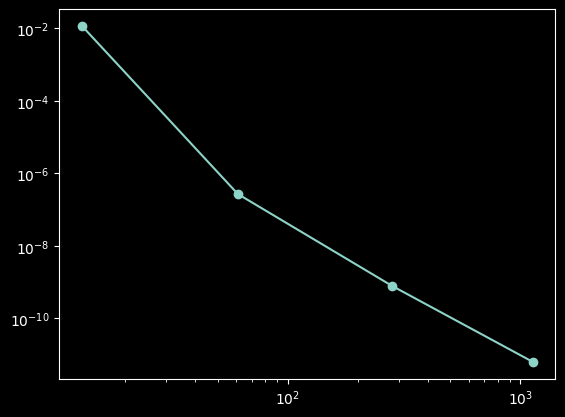

In [13]:
#9.7.2
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: np.log(x)**2
exact = 2
tolerance = [1e-3, 1e-6, 1e-9, 1e-12]
err = []
length = []

for tol in tolerance:
    I, x = intsing(f, tol)
    err.append(abs(exact - I))
    length.append(x.size)

loglog(length, err, "-o")

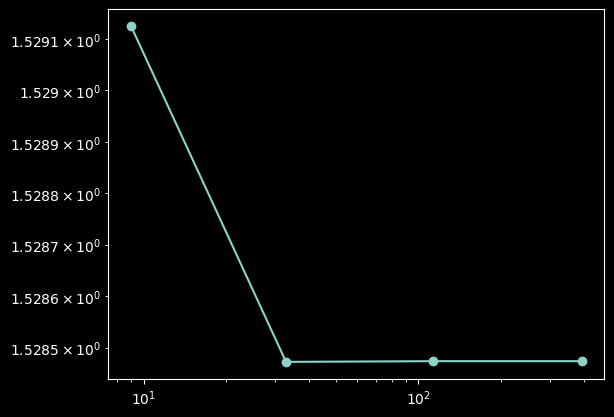

In [14]:
#9.7.3
import numpy as np
import matplotlib.pyplot as plt

def intsemi(f, tol):
    xi = lambda t: np.exp(np.sinh(t))
    dxi_dt = lambda t: np.exp(np.sinh(t))
    g = lambda t: f(xi(t)) * dxi_dt(t)

    M = 3
    while abs(g(M)) > tol/100:
        M += 0.5
        if np.isinf(xi(M)):
            warnings.warn("Function may not decay fast enough.")
            M -= 0.5
            break

    I, t = intadapt(g, 0 , M, tol)
    x = xi(t)
    return I, x

f = lambda x: np.exp(-x) / np.sqrt(x)
exact = np.sqrt(np.pi)

tolerance = [1e-3, 1e-6, 1e-9, 1e-12]
err = []
length = []
for tol in tolerance:
    I, x = intsemi(f, tol)
    err.append(abs(exact - I))
    length.append(x.size)

loglog(length, err, "-o")

